# 1 - Perkenalan

Nama      : Muhamamd Aji Satrio Wiyogo

Batch     : FTDS - RMT - 20

Dataset   : https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv

Objective : Tujuan dari analisis yang dilakukan adalah untuk mengidentifikasi atau memprediksi pelanggan yang berpotensi berhenti menggunakan layanan (churn) atau tidak. Teknik pemodelan prediktif juga dapat digunakan untuk meramalkan dan mengatasi secara proaktif potensi churn, memungkinkan perusahaan untuk mengambil tindakan proaktif untuk mempertahankan pelanggan yang berisiko churn.


# 2 - Import Libraries

In [439]:
#import libraries
%pip install feature-engine
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder,  OneHotEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
import time
import json
import pickle


Note: you may need to restart the kernel to use updated packages.


# 3 - Data Loading

In [2]:
#read data
data = pd.read_csv('customer_churn_dataset-training-master.csv')

In [3]:
#overview head
data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [4]:
#overview tail
data.tail(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440823,449990.0,48.0,Male,11.0,27.0,1.0,18.0,Standard,Annual,618.28,5.0,0.0
440824,449991.0,41.0,Male,46.0,25.0,3.0,2.0,Standard,Quarterly,619.79,15.0,0.0
440825,449992.0,41.0,Male,27.0,20.0,2.0,12.0,Standard,Quarterly,634.17,27.0,0.0
440826,449993.0,49.0,Male,37.0,23.0,4.0,16.0,Standard,Annual,666.65,30.0,0.0
440827,449994.0,45.0,Male,6.0,25.0,2.0,15.0,Basic,Annual,837.00,2.0,0.0
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [463]:
data.min()

Age                    18.0
Gender               Female
Tenure                  1.0
Usage Frequency         1.0
Support Calls           0.0
Payment Delay           0.0
Subscription Type     Basic
Contract Length      Annual
Total Spend           100.0
Last Interaction        1.0
Churn                   0.0
dtype: object

In [462]:
data.max()

Age                       65.0
Gender                    Male
Tenure                    60.0
Usage Frequency           30.0
Support Calls             10.0
Payment Delay             30.0
Subscription Type     Standard
Contract Length      Quarterly
Total Spend             1000.0
Last Interaction          30.0
Churn                      1.0
dtype: object

In [5]:
#duplicate data
data_duplicate = data.copy()

In [6]:
#checking unique data
data.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [7]:
#checking null
null_rows = data.loc[data.isnull().any(axis=1)]

In [8]:
#checking null
null_rows

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Terlihat null data terdapat dismua feature, sehingga bisa dikategorikan MCAR. sehingga bisa kita drop saja

In [9]:
#drop
data.dropna(axis=0, inplace=True)


Karena dilihat feature customer id tidak terlalu membantu dalam analisis kita akan mendrop feature ini

In [10]:
#drop feature customerid
data = data.drop('CustomerID', axis=1)

In [11]:
#checking data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.0,1.0,1.0,1.0


# 4- Exploratory Data Analysis ( EDA )

In [13]:
#define color
colors_4 = sns.color_palette('YlOrBr_r')

In [15]:
#membuat fungsi plotpie
def plot_pie( variables , m ) :
    if m[variables].nunique() == 2 :
        explodes = [0, 0.05]
    else :   
        explodes = [0, 0.05, 0.025]
    m[variables].value_counts().plot.pie(autopct='%1.0f%%', 
                                   pctdistance=0.7,
                                   explode = explodes,
                                   wedgeprops = {'edgecolor' : 'black'},  
                                   labeldistance=1.1, 
                                   colors=colors_4 )
    plt.title(f'{variables} Distribution')

In [ ]:
#membuat fungsi countplot
def eda_countplot(x, y, data):
    feat = x
    hue = y
    hue_type = data[hue].dtype.type
    groups = data[feat].unique()
    proportions = data.groupby(feat)[hue].value_counts(normalize=True).unstack()
    ax = sns.countplot(x=feat, hue=hue, data=data, palette ='YlOrBr_r')
    for c in ax.containers:
        labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
        ax.bar_label(c, labels)


In [ ]:
#membuat fungsi kdeplot
def eda_displot(x, y, data):
    sns.kdeplot(data=data, x=x, hue=y, multiple="stack", palette ='YlOrBr_r', alpha=.7, fill = True)
    mode_number = data[data[y] == 1][x].value_counts().idxmax()
    median_number = np.median(data[x])
    plt.text(0.7, 0.6, f'Mode {x}: {mode_number:.2f}\nMedian {x}: {median_number:.2f}', transform=plt.gca().transAxes)
    plt.axvline(mode_number, color='red', linestyle='--', linewidth=1)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.title(f'{x} Distribution with {y} ')

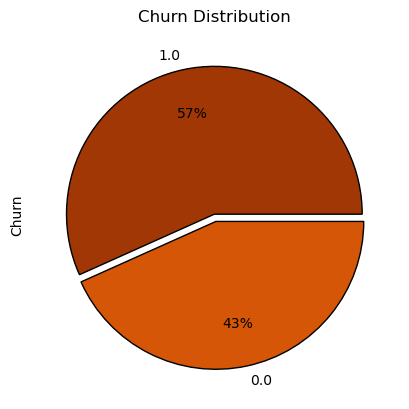

In [16]:
#plot
plot_pie('Churn', data)

Terlihat dari total data, data dengan nilai churn 1 memiliki data yang lebih dominan dibandingkan churn dengan nilai 0

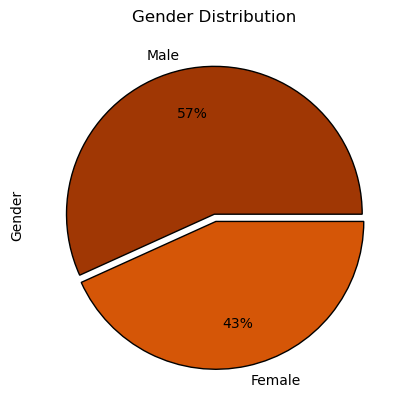

In [17]:
#plot
plot_pie('Gender', data)

Terlihat dari data, ternyata pelanggan pria lebih banyak dibandingkan perempuan

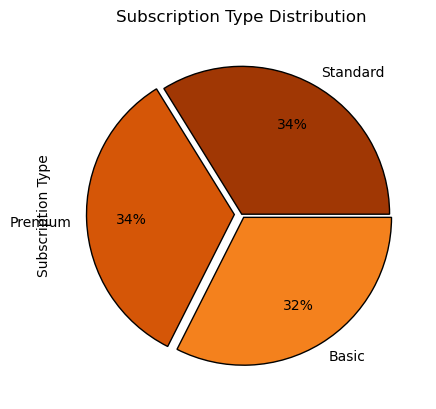

In [18]:
#plot
plot_pie('Subscription Type', data)

Dari data terlihat ternyata pengguna rata rata memiliki subscription tipe premium dan standard

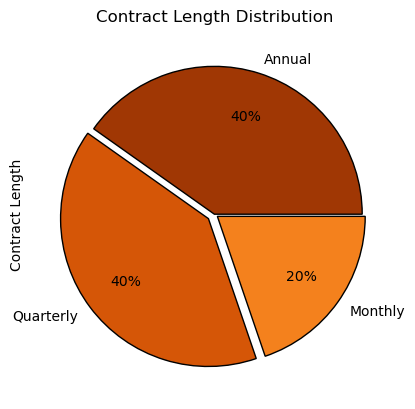

In [19]:
#plot
plot_pie('Contract Length', data)

Mayoritas pengguna ternyata banyak yang mengambil subscription secara annual dan quarterly dibandingkan monthly

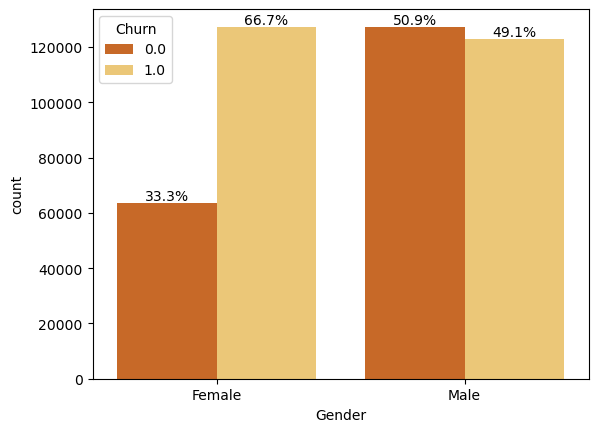

In [22]:
#plot
eda_countplot('Gender', 'Churn', data)

Dari data terlihat, gender perempuan ternyata memiliki kecenderungan untuk churn dibandingkan pria.

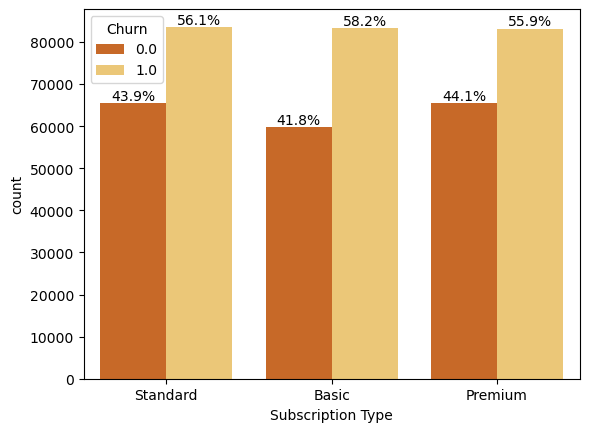

In [23]:
#plot
eda_countplot('Subscription Type', 'Churn', data)

Dari data terlihat, pelanggan dengan subscription tipe basic memiliki kecendrungan untuk churn paling tinggi dibandingkan subscription lainnya

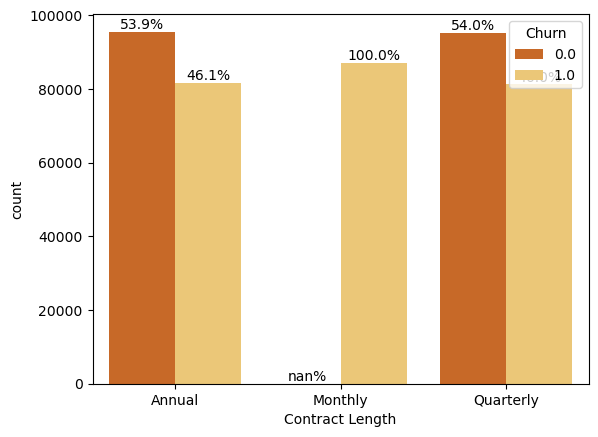

In [24]:
#plot
eda_countplot('Contract Length', 'Churn', data)

Dari data terlihat ternyata semua pelanggan yang mengambil mengambil subs bulanan mengalami churn, ini mungkin bisa dikatakan antara pelanggan tersebut beralih ke contract length lebih lama atau bisa jadi churn .

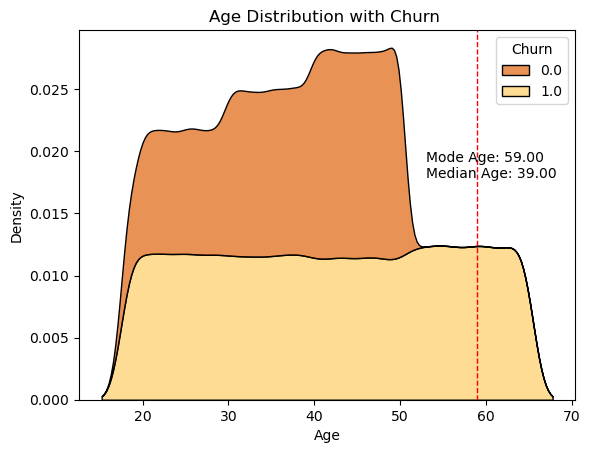

In [26]:
#plot
eda_displot('Age', 'Churn', data)

Dari data ternyata hampir semua umur memiliki kecendrungan untuk churn, dimana umur 60 tahun memiliki churn yang paling tinggi.

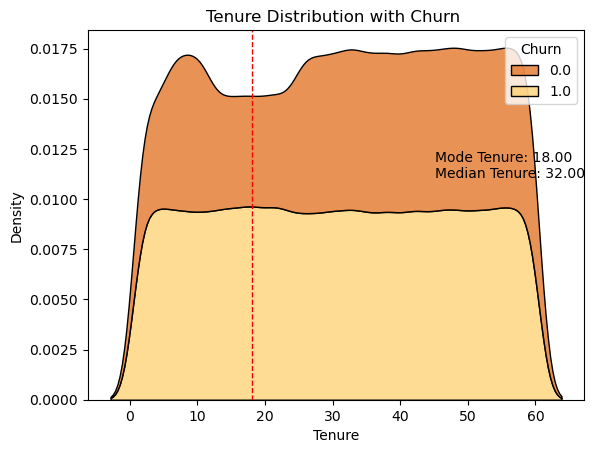

In [27]:
#plot
eda_displot('Tenure', 'Churn', data)

Dari plot ternyata customer dengan tenure dengan 18 bulan memiliki kecenderungan churn paling tinggi, meskipun semua data terlihat sama.

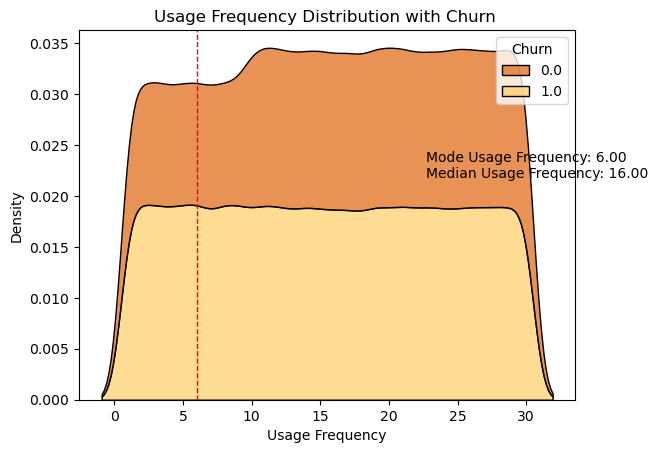

In [28]:
#plot
eda_displot('Usage Frequency', 'Churn', data)

Dari plot ternyata customer dengan usage frequency dengan 6 kali memiliki kecenderungan churn paling tinggi

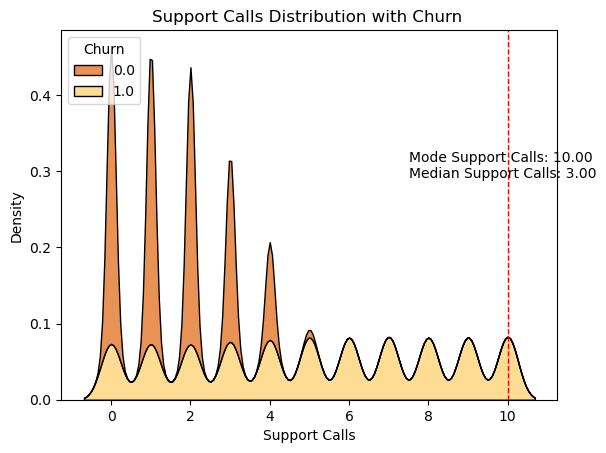

In [29]:
#plot
eda_displot('Support Calls', 'Churn', data)

Dari plot ternyata customer dengan support calls sebanyak 10 kali memiliki kecenderungan churn paling tinggi

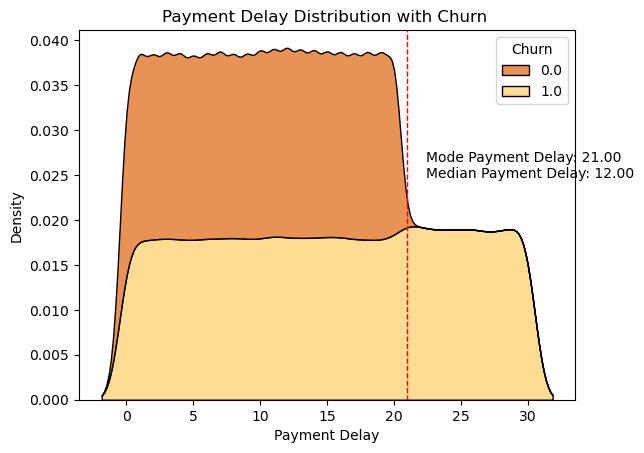

In [30]:
#plot
eda_displot('Payment Delay', 'Churn', data)

Dari plot ternyata customer dengan payment delay selama 21 bulan memiliki kecendrungan untuk churn paling tinggi

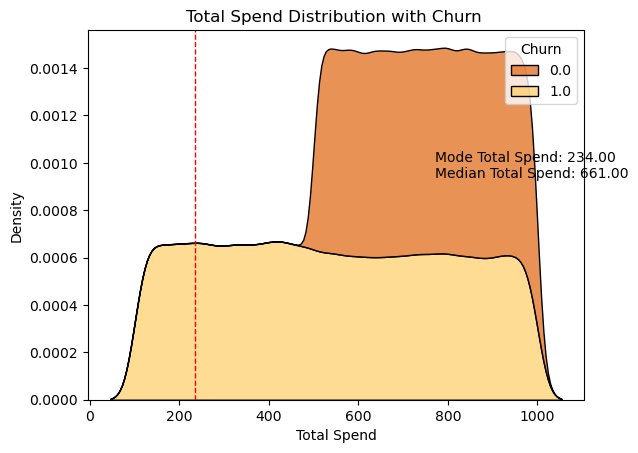

In [31]:
#plot
eda_displot('Total Spend', 'Churn', data)

Dapat terlihat customer dengan total spend yang rendah memiliki churn yang paling tinggi

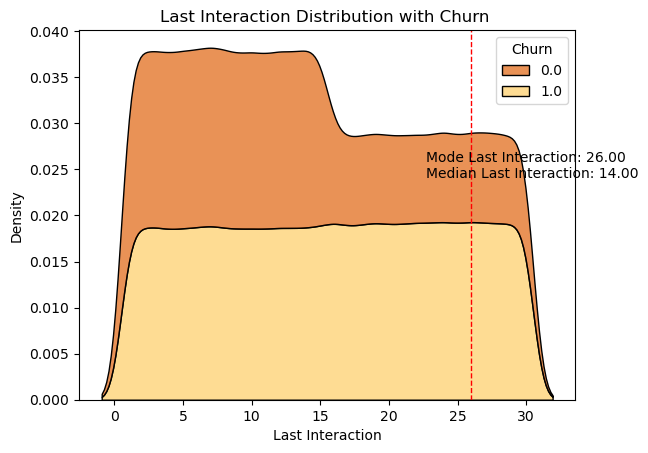

In [32]:
#plot
eda_displot('Last Interaction', 'Churn', data)

Dapat terlihat customer dengan last interaction yang sudah lama , atau disini selama 26 bulan memiliki kecendungan untuk churn yang tinggi

#  5- Feature Engineering

Setelah dilakukan exploratory data analysis, maka dapat dilakukan feature engineering dari data.

## Split between `X` (Feature) and `y`(Target)

In [33]:
#membuat copy data
new_data = data.copy()

In [35]:
#memisah feature dan target
X = new_data.drop(['Churn'], axis = 1)
y = new_data['Churn']

In [36]:
#memisah feature train test dan target train test
X_train , X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=13, stratify=y)

## Handle Outlier

Dilakukan pengecheckan outlier terhadap data, dan apabila data yang dimiliki mempunyai outlier maka akan dilakukan pembersihan outlier

In [37]:
#define cat dan num features
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

 Value skewness of Age  :  0.1619406249134076
 Value skewness of Tenure  :  -0.06183935510854001
 Value skewness of Usage Frequency  :  -0.04300512816077732
 Value skewness of Support Calls  :  0.6663605897520323
 Value skewness of Payment Delay  :  0.26866740146622786
 Value skewness of Total Spend  :  -0.4558265616271842
 Value skewness of Last Interaction  :  0.17593943874113518


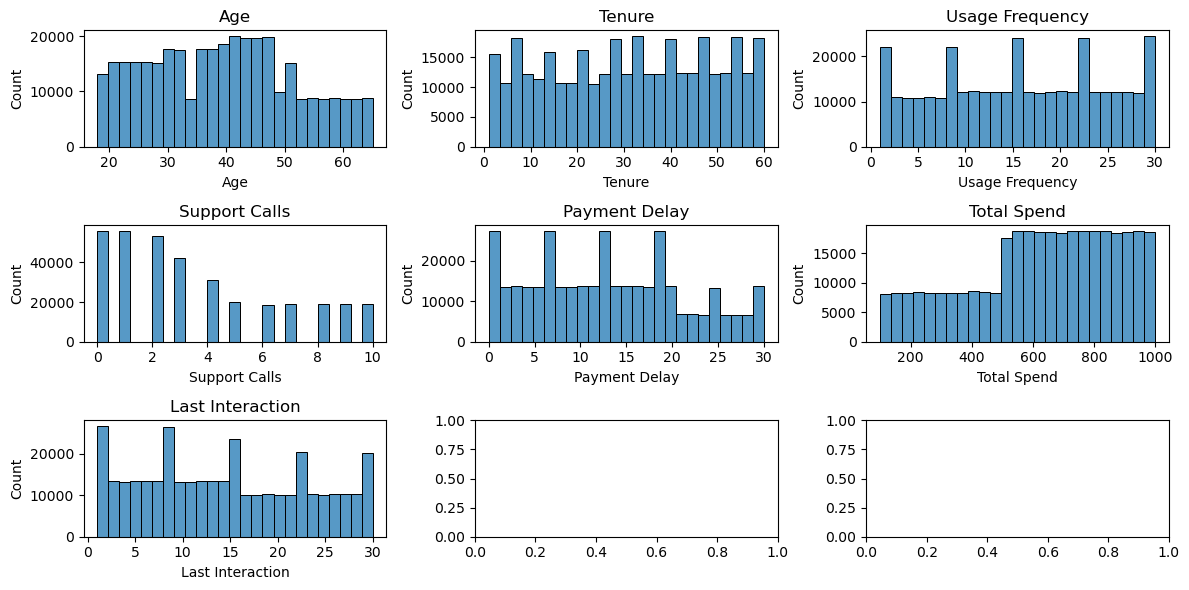

In [39]:
#menampilkan distribusi data pada feature
fig, axes = plt.subplots(3, 3, figsize=(12, 6)) 

for i, col in enumerate(num_features):
    row_idx = i // 3 
    col_idx = i % 3 

    sns.histplot(data=X_train[col], bins=25, ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  
    print(f' Value skewness of {col}  : ', X_train[col].skew())
plt.tight_layout() 
plt.show()

Dari hasil penelusuran data , feature Age, Tenure, dan Usage Frequency yang memeliki distribusi normal sedangkan yang lainnya mempunyai skewness.

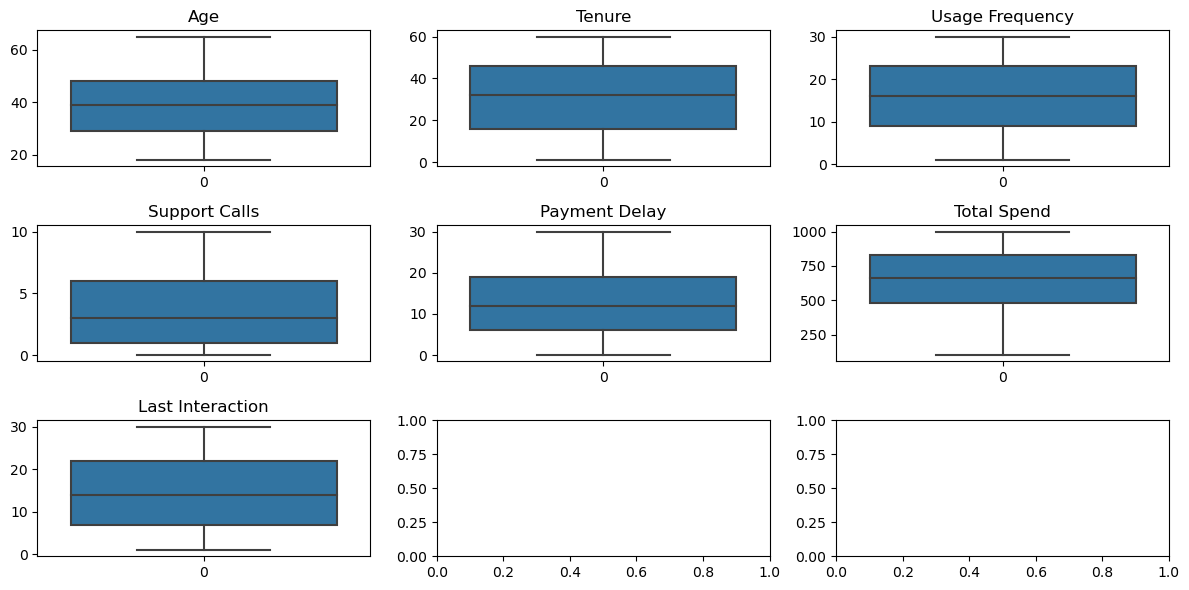

In [40]:
#checking outliers
fig, axes = plt.subplots(3, 3, figsize=(12, 6)) 

for i, col in enumerate(num_features):
    row_idx = i // 3 
    col_idx = i % 3 
    sns.boxplot(data=X_train[col],  ax=axes[row_idx, col_idx]) 
    axes[row_idx, col_idx].set_title(col)  
plt.tight_layout() 
plt.show()

Dari hasil yang didapatkan sepertinya data yang diberikan sudah tidak memiliki outlier yang ada . Sehingga tidak perlu dilakukan pembersihan dari outliers.

## Handle missing values

Sebelum dilakukan feature engineering lainnya, maka dilakukan pengecheckan missing values

In [41]:
#check missing values
X_train.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
dtype: int64

In [42]:
#check missing values
X_test.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
dtype: int64

In [43]:
#check missing values
y_train.isna().sum()

0

In [44]:
#check missing values
y_test.isna().sum()

0

Setelah dari hasil penelusuran tidak ada missing values, sehingga bisa dilanjutkan ke tahap selanjutnya

## Feature Selection

Pada section ini akan dilakukan feature selection, dimana untuk categorical akan dilakukan feature importances berdasarkan chisquare sedangkan numeric akan dilakukan correlation pearson test

In [45]:
#copy data
fs = X_train.copy()
fs_cat = X_train[cat_features]
fs_num = X_train[num_features]
fs_num['Churn'] = y_train

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_10120\1620759718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs_num['Churn'] = y_train


Karena pada categorical mempunyai urutan yang lebih besar pada feature featurenya , maka digunakan ordinal encoder terlebih dahulu untuk dilakukan chi test

In [48]:
#Feature encoding
oe = OrdinalEncoder(categories=[ ['Female', 'Male']
                                ,['Monthly', 'Quarterly' , 'Annual']
                                ,['Basic', 'Standard', 'Premium']])
fs_cat[['Gender', 'Contract Length', 'Subscription Type']] = oe.fit_transform(fs_cat[['Gender', 'Contract Length', 'Subscription Type']])


C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_10120\1504050903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs_cat[['Gender', 'Contract Length', 'Subscription Type']] = oe.fit_transform(fs_cat[['Gender', 'Contract Length', 'Subscription Type']])


In [49]:
#test chiscore
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(fs_cat, y_train)
chi2_scores = pd.DataFrame({'Feature': fs_cat.columns, 'Chi2 Score': chi2_selector.scores_, 'p-value': chi2_selector.pvalues_})
chi2_scores.sort_values(by='Chi2 Score', ascending=False, inplace=True)
print(chi2_scores)

             Feature    Chi2 Score       p-value
2    Contract Length  19605.291327  0.000000e+00
0             Gender   4650.135251  0.000000e+00
1  Subscription Type     92.992233  5.249996e-22


Berdasarkan hasil chi test , semua feature sepertinya secara statistic mempunyai statistically signifikan terhadap target. Sehingga tidak ada yang perlu di drop

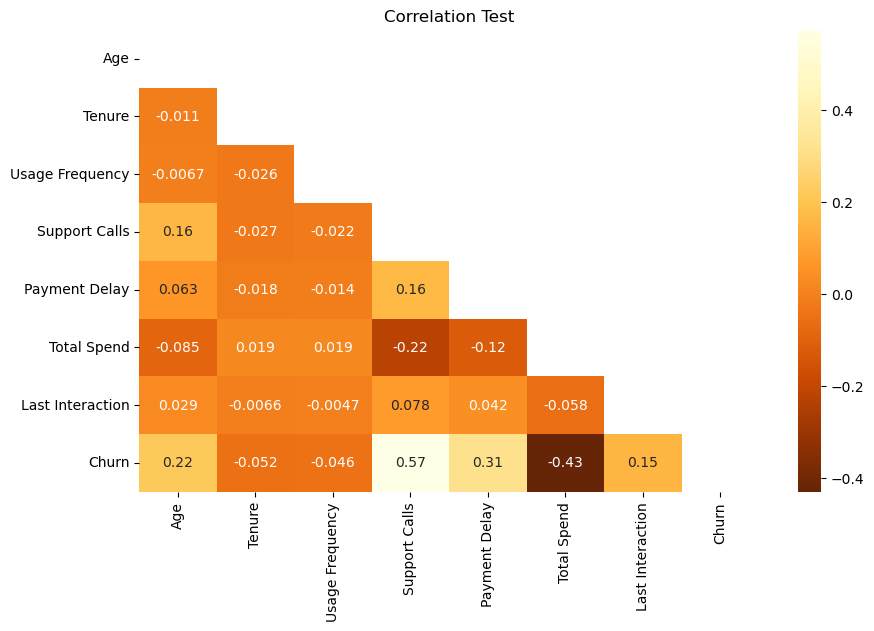

In [50]:
#membuat korelasi test
plt.figure(figsize=(10, 6))
corr_matrix = fs_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap ='YlOrBr_r' )
plt.title('Correlation Test')
plt.show()

Dari hasil korelasi test , tenure dan usage frequency mempunyai nilai korelasi yang rendah terhadap churn. Sehingga kedua feature ini bisa di drop.

In [51]:
X_train_fs = X_train.drop(['Tenure', 'Usage Frequency'], axis=1)
X_test_fs = X_test.drop(['Tenure', 'Usage Frequency'], axis=1)

## SMOTENC

In [231]:
y_train.value_counts()

1.0    199999
0.0    152666
Name: Churn, dtype: int64

Karena dari exploratory data sebelumnya data churn lebih dominan dengan yang tidak churn , maka dilakukan oversampling terhadap data customer yang tidak churn. Hal ini guna untuk mengatasi bias dalam model

In [227]:
#smotenc pada train
categorical_feature_indices = [1, 4, 5]
smotenc = SMOTENC(categorical_features=categorical_feature_indices, random_state=13, )
X_train_balanced_fs, y_train_balanced_fs = smotenc.fit_resample(X_train_fs, y_train)

In [229]:
#checking 
y_train_balanced_fs.value_counts()

1.0    199999
0.0    199999
Name: Churn, dtype: int64

Dapat terlihat customer yang tidak churn sekarang sudah sama jumlahnya dengan customer yang churn

## Split betweeen numerical feature and categorical feature


In [298]:
#check name colum
X_train_balanced_fs.columns

Index(['Age', 'Gender', 'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction'],
      dtype='object')

In [321]:
#define variable categorical feature dan numerical feature

cat_features_1 = ['Gender']
cat_features_2 = ['Subscription Type', 'Contract Length']
num_features_1 = X_train_balanced_fs.select_dtypes(include=['int', 'float']).columns.tolist()
X_train_fs_1 = X_train_balanced_fs.copy()
X_test_fs_1= X_test_fs.copy()

## Feature Scalling & Feature Encoding


Sebelum dilakukan pembuatan model, dilakukan feature scaling dan encoding terhadap data

In [322]:
#overview data
X_train_fs_1

,Age,Gender,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,19.000000,Male,8.000000,16.000000,Premium,Quarterly,509.000000,24.000000
1,44.000000,Male,3.000000,1.000000,Standard,Annual,642.260000,26.000000
2,40.000000,Male,1.000000,14.000000,Basic,Quarterly,584.450000,13.000000
3,30.000000,Male,3.000000,13.000000,Standard,Quarterly,991.060000,4.000000
4,46.000000,Female,8.000000,14.000000,Standard,Annual,977.000000,6.000000
...,...,...,...,...,...,...,...,...
399993,22.028261,Male,1.028261,3.028261,Basic,Quarterly,896.867174,14.000000
399994,42.071811,Male,1.446142,19.517953,Standard,Annual,625.290405,27.964095
399995,44.801007,Male,3.000000,8.801007,Basic,Quarterly,744.087859,24.399664
399996,47.060296,Male,1.939704,15.879407,Premium,Annual,960.482923,14.939704


Karena pada cat_features_2 memiliki tingkatan dalam categorynya, sedangkan gender tidak. Maka disini dilakukan 2 process yang berbeda pada tipe kategorik, dimana feature subs type dan contract length digunakan ordinalencoder dan feature gender dilakukan onehotencoder.

In [323]:
#pipeline feature scaling & encoding

category_1 = ['Basic', 'Standard', 'Premium']
category_2= ['Monthly', 'Quarterly', 'Annual']
preprocessing_pipeline = ColumnTransformer([
    ('numerical', MinMaxScaler(), num_features_1),  # Step 1: MinMaxScaler for numerical features
    ('categorical_1', OneHotEncoder(), cat_features_1),
    ('categorical_2', OrdinalEncoder(categories=[category_1, category_2]), cat_features_2)
])

preprocessing_pipeline.fit(X_train_fs_1)
X_train_processed = preprocessing_pipeline.transform(X_train_fs_1)
X_test_processed = preprocessing_pipeline.transform(X_test_fs_1)

In [326]:
#membuat dataframe

ohe = preprocessing_pipeline.named_transformers_['categorical_1']
cat_feature_names = ohe.get_feature_names_out(cat_features_1)
all_feature_names = num_features_1 + list(cat_feature_names) + cat_features_2
X_train_final_balanced = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_final_balanced = pd.DataFrame(X_test_processed, columns=all_feature_names)

#  6-Model Definition

## Algorithm
### Logistic Regression	

Logistic Regression adalah algoritma yang digunakan untuk melakukan klasifikasi biner atau multikelas. Algoritma ini menggunakan fungsi logistik untuk memprediksi probabilitas .Kelebihannya adalah mudah diinterpretasikan, komputasi yang efisien, dan dapat digunakan untuk memahami pengaruh variabel-variabel prediktor terhadap variabel target, namun algoritma ini memiliki kekurangan yaitu Cenderung tidakkerja dengan baik pada dataset yang memiliki fitur-fitur non-linear, dan tidak mampu menangani interaksi kompleks

### Decision Tree	

Decision Tree adalah algoritma yang menggunakan struktur pohon untuk membuat keputusan berdasarkan pengujian terhadap fitur-fitur pada dataset.
Kelebihannya adalah yaitu mudah dipahami dan diinterpretasikan, dapat menangani dataset dengan fitur yang tidak terstruktur. Namun kekurangannya yaitu cenderung memiliki kecenderungan overfitting pada data training dan dapat menghasilkan pohon yang kompleks dan sulit diinterpretasikan jika tidak dikendalikan.

### Random Forest

Random Forest adalah ensemble dari Decision Tree. Algoritma ini menggunakan beberapa pohon keputusan dan menggabungkan hasil prediksi mereka untuk menghasilkan prediksi yang lebih akurat.
Kelebihan dari algoritma ini mampu menangani dataset dengan fitur yang tidak terstruktur, dapat melibatkan paralelisasi untuk meningkatkan kecepatan, dan mengurangi risiko overfitting yang umum terjadi pada Decision Tree Kekurangannya yaitu , lebih lambat dalam pelatihan dan prediksi daripada Decision Tree tunggal, dan sulit untuk diinterpretasikan jika menggunakan jumlah pohon yang besar.

## KNN

KNN adalah algoritma klasifikasi yang didasarkan pada konsep bahwa instance yang serupa cenderung terletak dekat satu sama lain dalam ruang fitur.Kelebihannya mudah diimplementasikan dan tidak memerlukan proses pembelajaran yang kompleks, dapat menangani dataset dengan fitur yang tidak terstruktur, dan dapat memberikan hasil yang baik pada dataset dengan jumlah sampel yang sedikit.
Adapun kekurangannya yaitu , sangat sensitif terhadap skala dan dimensi fitur, dan dapat membutuhkan waktu komputasi yang lama jika datasetnya besar.

## Naive Bayes	

Naive Bayes adalah algoritma klasifikasi yang bekerja berdasarkan asumsi independensi antara fitur-fitur pada dataset. Adapaun kelebihannya yaitu mudah diimplementasikan, komputasi yang cepat, dan dapat memberikan hasil yang baik pada dataset dengan jumlah sampel yang sed.Kekurangannya yaitu asumsi independensi yang kuat dapat membuat algoritma ini tidak efektif pada dataset yang memiliki ketergantungan kompleks antara fitur-fitur, dan memiliki kecenderungan underfitting jika asumsi independensi tidak terpenuhi.

### XGBoost
XGBoost (Extreme Gradient Boosting) adalah algoritma ensemble yang menggunakan pendekatan boosting untuk pemodelan prediktif. Adapun kelebihan yang dimiliki algoritma ini yaitu Kemampuan memodelkan hubungan yang kompleks, penanganan fitur yang tidak terstruktur, Kemampuan menangani dataset dengan jumlah sampel yang sedikit. Adapun kelemahan yang ada pada algoritma XGBoost antara lain Membutuhkan penyetelan parameter yang baik, Sensitif terhadap overfitting dan Waktu komputasi

### Metrics

- Accuracy: Merupakan metrik yang mengukur sejauh mana model dapat melakukan klasifikasi dengan benar secara keseluruhan. Akurasi dihitung sebagai rasio jumlah prediksi yang benar (true positive + true   negative) dibagi dengan jumlah total sampel.

- Precision: Merupakan metrik yang mengukur sejauh mana prediksi positif yang dihasilkan oleh model adalah benar. Precision dihitung sebagai rasio true positive dibagi dengan jumlah total prediksi positif (true positive + false positive).

- Recall: Merupakan metrik yang mengukur sejauh mana model dapat mendeteksi atau mengingat kelas positif yang sebenarnya. Recall dihitung sebagai rasio true positive dibagi dengan jumlah total sampel positif (true positive + false negative).

- F1-score: Merupakan metrik yang menggabungkan precision dan recall untuk memberikan ukuran yang seimbang antara keduanya. F1-score dihitung sebagai harmonic mean dari precision dan recall.
Support: Merupakan jumlah sampel yang ada dalam setiap kelas pada data yang dievaluasi.

### Objective & Metrics

Tujuan dari analisis yang dilakukan adalah untuk mengidentifikasi atau memprediksi pelanggan yang berpotensi berhenti menggunakan layanan (churn) atau tidak. Dimana pemodelan dapat digunakan untuk meramalkan dan mengatasi secara proaktif potensi churn, memungkinkan perusahaan untuk mengambil tindakan proaktif untuk mempertahankan pelanggan yang berisiko churn. Dari asumsi tersebut maka digunakan metrics accuracy guna mengukur prediksi model secara keseluruhan.

# 7 - Model Training

Dalam model training ini akan dilakukan inisiasi variable terhadap algoritma yang dipilih kecuali xgboost, dengan parameter normal dan dilakukan evaluasi dengan cross validation sehingga dapat dilihat model apa yang paling baik tanpa parameter.

In [440]:
#inisiasi variable
log_reg = LogisticRegression()
dt_reg = DecisionTreeClassifier()
rf_reg = RandomForestClassifier(n_jobs=-1)
knn_reg = KNeighborsClassifier()
nb_reg = GaussianNB()

In [337]:
#fitting model 

log_reg.fit(X_train_final_balanced, y_train_balanced_fs)

LogisticRegression()

In [338]:
dt_reg.fit(X_train_final_balanced, y_train_balanced_fs)

DecisionTreeClassifier()

In [444]:
rf_reg.fit(X_train_final_balanced, y_train_balanced_fs)

RandomForestClassifier(n_jobs=-1)

In [340]:
knn_reg.fit(X_train_final_balanced, y_train_balanced_fs)

KNeighborsClassifier()

In [445]:
nb_reg.fit(X_train_final_balanced, y_train_balanced_fs )

GaussianNB()

# 8 - Model Evaluation


In [292]:
from sklearn.metrics import classification_report

In [341]:
#evaluasi model logistic regression
y_pred_train = log_reg.predict(X_train_final_balanced)
print('Classification Report  : \n', classification_report(y_train_balanced_fs, y_pred_train))
accuracy_score_train_cross_val_log_reg = cross_val_score(log_reg,
                                           X_train_final_balanced,
                                           y_train_balanced_fs,
                                           cv=5,
                                           n_jobs= -1, 
                                           verbose=2, 
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_log_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_log_reg.std())

Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88    199999
         1.0       0.89      0.85      0.87    199999

    accuracy                           0.88    399998
   macro avg       0.88      0.88      0.88    399998
weighted avg       0.88      0.88      0.88    399998



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


Accuracy Score - Mean - Cross Validation :  0.875556888554857
Accuracy Score - Std - Cross Validation  :  0.003560257710182467


In [342]:
#evaluasi model logistic regression
y_pred_train = dt_reg.predict(X_train_final_balanced)
print('Classification Report  : \n', classification_report(y_train_balanced_fs, y_pred_train))
accuracy_score_train_cross_val_dt_reg = cross_val_score(dt_reg,
                                           X_train_final_balanced,
                                           y_train_balanced_fs,
                                           cv=5,
                                           n_jobs= -1, 
                                           verbose=2,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_dt_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_dt_reg.std())

Classification Report  : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199999
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    399998
   macro avg       1.00      1.00      1.00    399998
weighted avg       1.00      1.00      1.00    399998



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


Accuracy Score - Mean - Cross Validation :  0.9945249788122352
Accuracy Score - Std - Cross Validation  :  0.0012128564734624147


In [446]:
#evaluasi model logistic regression
y_pred_train = rf_reg.predict(X_train_final_balanced)
print('Classification Report  : \n', classification_report(y_train_balanced_fs, y_pred_train))
accuracy_score_train_cross_val_rf_reg = cross_val_score(rf_reg,
                                           X_train_final_balanced,
                                           y_train_balanced_fs,
                                           cv=5,                                           
                                           n_jobs= -1, 
                                           verbose=2,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_rf_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_rf_reg.std())

Classification Report  : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199999
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    399998
   macro avg       1.00      1.00      1.00    399998
weighted avg       1.00      1.00      1.00    399998



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   46.0s remaining:   30.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.5s finished


Accuracy Score - Mean - Cross Validation :  0.997739989437368
Accuracy Score - Std - Cross Validation  :  0.00012707039069312872


In [348]:
#evaluasi model logistic regression
y_pred_train = knn_reg.predict(X_train_final_balanced)
print('Classification Report  : \n', classification_report(y_train_balanced_fs, y_pred_train))
accuracy_score_train_cross_val_knn_reg = cross_val_score(knn_reg,
                                           X_train_final_balanced,
                                           y_train_balanced_fs,
                                           cv=5,                                            
                                           n_jobs= -1, 
                                           verbose=2,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_knn_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_knn_reg.std())

Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    199999
         1.0       1.00      0.96      0.98    199999

    accuracy                           0.98    399998
   macro avg       0.98      0.98      0.98    399998
weighted avg       0.98      0.98      0.98    399998



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   20.9s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.2s finished


Accuracy Score - Mean - Cross Validation :  0.9756248773109665
Accuracy Score - Std - Cross Validation  :  0.00037321591809439086


In [451]:
#evaluasi model logistic regression
y_pred_train = nb_reg.predict(X_train_final_balanced)
print('Classification Report  : \n', classification_report(y_train_balanced_fs, y_pred_train))
accuracy_score_train_cross_val_nb_reg = cross_val_score(nb_reg,
                                           X_train_final_balanced,
                                           y_train_balanced_fs,
                                           cv=5,                                           
                                           n_jobs= -1, 
                                           verbose=2,
                                           scoring='accuracy')
print('Accuracy Score - Mean - Cross Validation : ', accuracy_score_train_cross_val_nb_reg.mean())
print('Accuracy Score - Std - Cross Validation  : ', accuracy_score_train_cross_val_nb_reg.std())

Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94    199999
         1.0       0.96      0.91      0.93    199999

    accuracy                           0.93    399998
   macro avg       0.94      0.93      0.93    399998
weighted avg       0.94      0.93      0.93    399998



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Accuracy Score - Mean - Cross Validation :  0.9348321881836024
Accuracy Score - Std - Cross Validation  :  0.003164307556101193


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [452]:
#membuat tabel mean dan std
score_reports = [
    ('logistic', accuracy_score_train_cross_val_log_reg.mean(), accuracy_score_train_cross_val_log_reg.std()),
    ('dt', accuracy_score_train_cross_val_dt_reg.mean(), accuracy_score_train_cross_val_dt_reg.std()),
    ('rf', accuracy_score_train_cross_val_rf_reg.mean(), accuracy_score_train_cross_val_rf_reg.std()),
    ('knn', accuracy_score_train_cross_val_knn_reg.mean(), accuracy_score_train_cross_val_knn_reg.std()),
    ('nb', accuracy_score_train_cross_val_nb_reg.mean(), accuracy_score_train_cross_val_nb_reg.std() )
]

df = pd.DataFrame(score_reports, columns=['model', 'mean', 'std'])
df

,model,mean,std
0,logistic,0.875557,0.003560
1,dt,0.994525,0.001213
2,rf,0.997740,0.000127
3,knn,0.975625,0.000373
4,nb,0.934832,0.003164


Berdasarkan hasil mean accuracy score, decision tree dan random forest merupakan algoritma terbaik. Namun perlu diperhatikan meskipun random forest memiliki mean accuarcy score yang paling baik, waktu komputasi randomforest yang lama menjadi kelemahan algoritmanya. Dari hasil ini bisa kita lanjutkan dengan melihat hasil yang diperoleh dengan data testnya dimana digunakan algoritma decision tree dan random forest sebagai base awal
Karena KNN memakan  waktu terlalu dalam komputasinya disini, jadi saya mengubah atau merubah model knn yang sebelumnya akan dipakai menjadi model XGBoost sebagai pengganti model knn tersebut


In [350]:
y_pred_train_dt = dt_reg.predict(X_train_final_balanced)
y_pred_test_dt = dt_reg.predict(X_test_final_balanced)
print('Classification Report  : \n', classification_report(y_train_balanced_fs, y_pred_train_dt))
print('Classification Report  : \n', classification_report(y_test, y_pred_test_dt))


Classification Report  : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199999
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    399998
   macro avg       1.00      1.00      1.00    399998
weighted avg       1.00      1.00      1.00    399998

Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     38167
         1.0       0.99      1.00      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



Confusion Matrix      : 


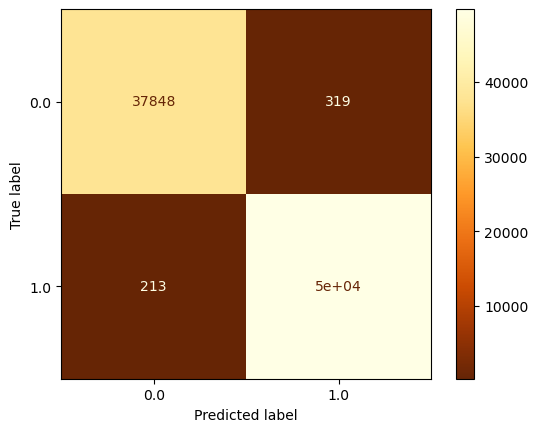

In [373]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_reg, X_test_final_balanced, y_test, cmap='YlOrBr_r'))

Dari hasil yang didapatkan secara data, model menunjukkan good fit dimana nilai prediksi 0 , dan 1 sama sama baik. Kemudian secara accuracy sebenarnya model sudah sangat baik dimana dapat memprediksi 0.99% secara keseluruhan data yang ada, dan dapat terlihat model hanya menjukkan 213 kesalahan prediksi untuk kategori 1 dan 319 kesalahan untuk prediksi 0.

In [352]:
y_pred_train_rf = rf_reg.predict(X_train_final_balanced)
y_pred_test_rf = rf_reg.predict(X_test_final_balanced)
print('Classification Report  : \n', classification_report(y_train_balanced_fs, y_pred_train_rf))
print('Classification Report  : \n', classification_report(y_test, y_pred_test_rf))

Classification Report  : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199999
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    399998
   macro avg       1.00      1.00      1.00    399998
weighted avg       1.00      1.00      1.00    399998

Classification Report  : 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



Confusion Matrix      : 


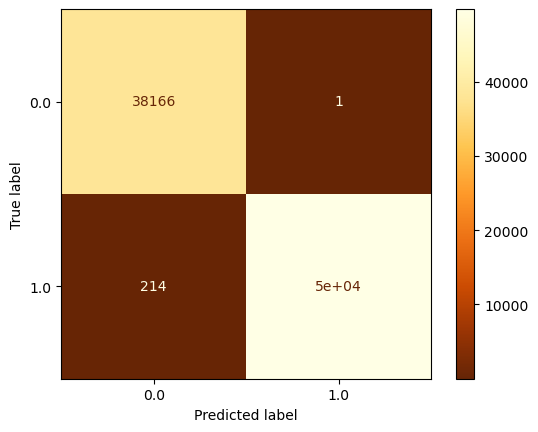

In [372]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_reg, X_test_final_balanced, y_test, cmap='YlOrBr_r'))

Dari hasil yang didapatkan secara data, model menunjukkan good fit dimana nilai prediksi 0 , dan 1 sama sama baik. Kemudian secara accuracy sebenarnya model sudah sangat baik dimana dapat memprediksi 0.99% secara keseluruhan data yang ada, dan dapat terlihat model hanya menjukkan 214 kesalahan prediksi untuk kategori 1 dan 1 kesalahan untuk prediksi 0. Hal ini bisa dibilang lebih baik performanya dibandingkan menggunakan decision tree, akan tetapi waktu komputasi train yang sangat lama membuat algoritma ini menjadi kelemahan yang fatal. Dalam Step selanjutnya mari kita coba lanjutkan dengan parameter paramater yang baik, dan juga pada tahap selanjutnya akan dibandingkan dengan 1 tambahan algoritma ensemble XGBOOST yang akan menggantikan algoritma KNN yang dirasa waktu komputasinya terlalu lama

In [368]:
# create logisticregression gridsearch
logistic_reg = LogisticRegression()

param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

scorer = make_scorer(accuracy_score)
grid_search_logistic = GridSearchCV(logistic_reg, param_grid=param_grid_logistic, cv=5, scoring=scorer, n_jobs=-1, verbose=2)
start = time.time()
grid_search_logistic.fit(X_train_final_balanced, y_train_balanced_fs)
end = time.time()
time_grid_logistic = end - start
print("Best Parameters - Logistic Regression: ", grid_search_logistic.best_params_)
print("Best Score - Logistic Regression: ", grid_search_logistic.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters - Logistic Regression:  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score - Logistic Regression:  0.8755893886486081


## Decision Tree GridsearchCV

In [369]:
# Decision Tree gridsearch
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
scorer = make_scorer(accuracy_score)
dt_clf = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt_clf, param_grid=param_grid_dt, cv=5, scoring=scorer, n_jobs= -1, verbose= 2)
start = time.time()
grid_search_dt.fit(X_train_final_balanced, y_train_balanced_fs)
end = time.time()
time_grid_dt = end-start
print("Best Parameters - Decision Tree: ", grid_search_dt.best_params_)
print("Best Score - Decision Tree: ", grid_search_dt.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters - Decision Tree:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score - Decision Tree:  0.997294986718584


## Random Forest GridSearchCV

In [435]:
# create random forest 
rf_reg = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

scorer = make_scorer(accuracy_score)
grid_search_rf = GridSearchCV(rf_reg, param_grid=param_grid_rf, cv=5, scoring=scorer,  n_jobs= -1, verbose= 2)
start = time.time()
grid_search_rf.fit(X_train_final_balanced, y_train_balanced_fs)
end = time.time()
time_grid_rf = end-start
print("Best Parameters - Random Forest: ", grid_search_rf.best_params_)
print("Best Score - Random Forest: ", grid_search_rf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters - Random Forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score - Random Forest:  0.9977449894998687


## Naive Bayes GridsearchCV

In [453]:
#create naive bayes 
naive_bayes = GaussianNB()

param_grid_naive_bayes = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

scorer = make_scorer(accuracy_score)
grid_search_naive_bayes = GridSearchCV(naive_bayes, param_grid=param_grid_naive_bayes, cv=5, scoring=scorer, n_jobs=-1, verbose=2)
start = time.time()
grid_search_naive_bayes.fit(X_train_final_balanced, y_train_balanced_fs)
end = time.time()
time_grid_naive_bayes = end - start
print("Best Parameters - Naive Bayes: ", grid_search_naive_bayes.best_params_)
print("Best Score - Naive Bayes: ", grid_search_naive_bayes.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters - Naive Bayes:  {'var_smoothing': 1e-09}
Best Score - Naive Bayes:  0.9348321881836024


## XGBoost GridsearchCV

In [357]:
# XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100],
    'gamma': [0, 1, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier()
grid_search_xgb = GridSearchCV(xgb_clf, param_grid=param_grid_xgb, cv=5, scoring=make_scorer(accuracy_score),  n_jobs= -1, verbose= 2)
start = time.time()
grid_search_xgb.fit(X_train_final_balanced, y_train_balanced_fs)
end = time.time()
time_grid_xgb = end-start
print("Best Parameters - XGBoost: ", grid_search_xgb.best_params_)
print("Best Score - XGBoost: ", grid_search_xgb.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters - XGBoost:  {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best Score - XGBoost:  0.9977424894686184


In [456]:
#membuat tabel mean dan std
score_reports = [
    ('LogisticRegression', grid_search_logistic.best_score_, time_grid_logistic),
    ('DecisionTree', grid_search_dt.best_score_, time_grid_dt),
    ('RandomForest', grid_search_rf.best_score_, time_grid_rf ),
    ('NaiveBayes', grid_search_naive_bayes.best_score_, time_grid_naive_bayes),
    ('XGBoost', grid_search_xgb.best_score_, time_grid_xgb)
]

report_df_grid = pd.DataFrame(score_reports, columns=['model', 'Accuracy Score', 'Time'])
report_df_grid

,model,Accuracy Score,Time
0,LogisticRegression,0.875589,321.670409
1,DecisionTree,0.997295,39.436595
2,RandomForest,0.997745,1899.599536
3,Naive_Bayes,0.934832,0.924350
4,XGBoost,0.997742,1871.098975


Dari hasil yang didapatkan RandomForest memang yang paling baik secara accuracy , namun secara time DecisionTree memiliki waktu komputasi yang cepat dengan nilai accuracy yang hampir menyampai dari RandomForest. maka dapat dikatakan DecisionTree merupakan Algoritma yang paling baik digunakan dalam case ini.

## Pipeline for Best Algorithm

In [380]:
best_parameters = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
dt_clf = DecisionTreeClassifier(**best_parameters)
pipeline_best_dt = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('randomforest', dt_clf)
])

pipeline_best_dt.fit(X_train_balanced_fs, y_train_balanced_fs)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['Age', 'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('categorical_1',
                                                  OneHotEncoder(), ['Gender']),
                                                 ('categorical_2',
                                                  OrdinalEncoder(categories=[['Basic',
                                                                              'Standard',
                                                                              'Premium'],
                                                                             ['Monthly',
                                                                              'Quarterly',
                                                                              'Annual']]),
                                                  ['Subscription Type',
                                                   'Contract Length'])])),
                ('randomforest',
                 DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                                        min_samples_split=10))])

In [407]:
data_testing_final = pd.read_csv('customer_churn_dataset-testing-master.csv')
X_testing_final = data_testing_final.drop('Churn', axis=1)
y_testing_final = data_testing_final.Churn

In [412]:
from sklearn.metrics import classification_report
y_pred_train_pipe = pipeline_best_dt.predict(X_train_balanced_fs)
y_pred_test_pipe = pipeline_best_dt.predict(X_test_fs)
classification_report_train = classification_report(y_train_balanced_fs, y_pred_train_pipe)
classification_report_test = classification_report(y_test, y_pred_test_pipe)
print(classification_report_train)
print(classification_report_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199999
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    399998
   macro avg       1.00      1.00      1.00    399998
weighted avg       1.00      1.00      1.00    399998

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     38167
         1.0       1.00      0.99      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



Dari hasil diatas menujukkan, model sudah dalam goodfit dimana prediksi kategori 0 dan 1 menujukkan hasil yang sama sama baik dalam prediksinya.

Confusion Matrix      : 
Confusion Matrix      : 


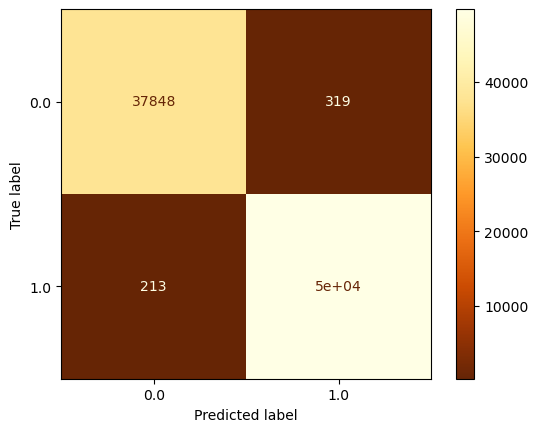

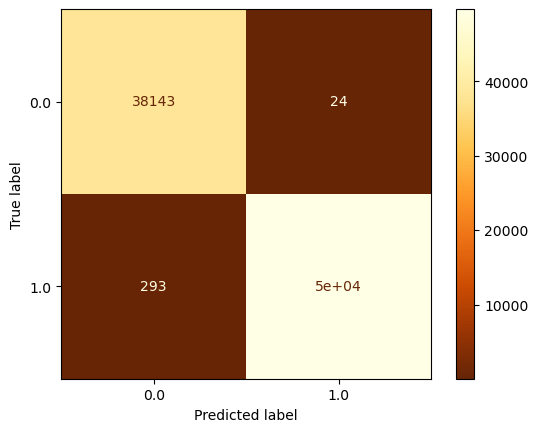

In [414]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_reg, X_test_final_balanced, y_test, cmap='YlOrBr_r'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_best_dt, X_test_fs, y_test, cmap='YlOrBr_r'))

Setelah hasil yang dilakukan dengan gridsearch terlihat jelas perbaikan dimana model antara lain
Sebelum dilakukan gridsearch model mempunyai kesalahan dalam memprediksi customer yang tidak churn namun terprediksi churn sebesar 319 , setelah dilakukan gridsearch model mempunyai kesalahan sebesar 24.

Sebelum dilakukan gridsearch model mempunyai kesalahan dalam memprediksi customer yang churn namun terprediksi tidak chrun sebesar 213, setelah dilakukan gridsearch model mempunyai kesalahan sebesar 293 yang artinya mengalami pemburukan

Namun apabila kita melihat nilai Accuracy dari DecisionTree sebelum dilakukannya gridsearchcv , nilai accuracynya bertambah dari 0.994525 menjadi 0.997294 dimana model lebih baik sebesar 0.003

In [405]:
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_pipe})
misclassified_indices = prediction_df[prediction_df['Actual'] != prediction_df['Predicted']].index
misclassified_data = X_test_fs.loc[misclassified_indices]
print("Misclassified Data:")
misclassified_data.describe().T


Misclassified Data:


,count,mean,std,min,25%,50%,75%,max
Age,317.0,38.769716,11.447761,18.0,30.0,39.0,47.0,64.0
Support Calls,317.0,1.750789,1.470504,0.0,0.0,2.0,3.0,5.0
Payment Delay,317.0,10.246057,6.228967,0.0,5.0,10.0,16.0,20.0
Total Spend,317.0,744.919495,148.437837,500.0,616.0,740.0,871.0,998.0
Last Interaction,317.0,12.984227,8.762499,1.0,6.0,11.0,19.0,30.0


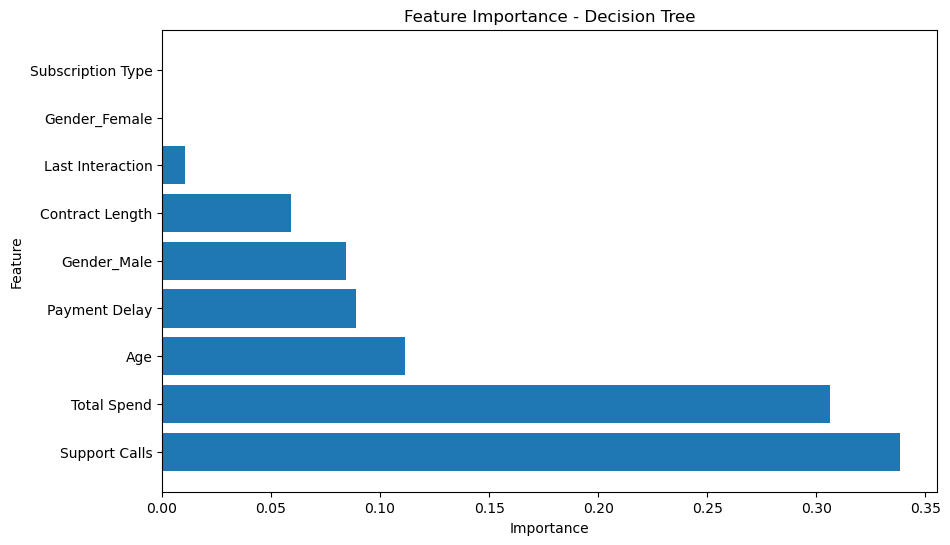

In [401]:
dt_model = pipeline_best_dt.named_steps['randomforest']
feature_importance_dt = dt_model.feature_importances_
feature_importance_df_dt = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance_dt})
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_dt['Feature'], feature_importance_df_dt['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.show()


Dari hasil lain menunjukkan beberapa insight, dimana ternyata hasil keputusan model mayoritas oleh total spend dan support calls. Dimana ternyata kesalahan prediksi model untuk feature Total Speend berada di 744.9 atau 755, dan Support Calls 1.750789 kali atau 1- 2 kali. Secara spesifik angka 755 pada total spend menunjukkan rata-rata total pengeluaran pada kelompok data yang gagal diprediksi. Artinya, pada rata-rata, pelanggan yang gagal diprediksi memiliki total pengeluaran sebesar 755 dalam periode waktu tertentu.

Sementara itu, angka 1.7 atau 1-2 kali pada Support  calls menunjukkan rata-rata jumlah panggilan dukungan yang dilakukan oleh pelanggan dalam kelompok data yang gagal diprediksi. Rata-rata, pelanggan yang gagal diprediksi melakukan 1. 7 panggilan dukungan dalam periode waktu tertentu. 

## Business Analysis

Secara keseluruhan, model Decision Tree yang diperoleh telah menunjukkan performa yang baik dengan tingkat kepercayaan sebesar 99.7294%. Hal ini memungkinkan bisnis untuk mengandalkan hasil prediksi dalam mengarahkan upaya retensi pelanggan, alokasi sumber daya, dan pengembangan strategi pemasaran yang lebih efektif. Tingkat kepercayaan yang tinggi dalam model juga membantu dalam menjaga kepercayaan pelanggan dan meningkatkan citra bisnis secara keseluruhan.Meskipun model menunjukkan hasil yang baik, terdapat beberapa kesalahan prediksi yang perlu diperhatikan. Terdapat 293 kesalahan dalam memprediksi pelanggan yang seharusnya churn, namun diprediksi tidak churn. Untuk mengidentifikasi penyebab kesalahan ini, kita dapat menganalisis dari kelompok mana pelanggan ini berasal.Dalam analisis sebelumnya, ditemukan bahwa model mengalami kesulitan dalam memprediksi pelanggan dengan total pengeluaran rata-rata sebesar 755 dan rata-rata panggilan dukungan sebanyak 1.7 kali. Hal ini menunjukkan bahwa pola perilaku pelanggan dengan karakteristik ini sulit diidentifikasi dengan tepat oleh model. Sehingga langkah selanjutnya , kita bisa mewaspadai customer dengan kriteria diatas, dimana model sulit untuk memprediksi.

## Model Improvement

Dapat terlihat memang model sudah mendapatkan hasil yang baik, akan tetapi ada beberapa model improvement yang bisa diusulkan. Yang pertama data yang diberikan menurut saya mempunyai variansi data yang kurang sehingga apabila diberikan data diluar variansi data test , kemungkinan hasil yang didapat akan buruk. Kemudian bisa digunakan PCA dalam implementasi improvement model, PCA digunakan guna untuk mengurangi dimensi dari feature. Sehingga apabila digunakan PCA, kita dapat melihat komputasi algoritma yang memakan waktu lama bisa menjadi lebih cepat dan mungkin bisa memberikan improvement dalam segi accuracy atau metrics lainnya. Dapat digunakan algoritma ensamble lainnya seperti ADABOOST, GradientBoosting ,etc. 

# 9 - Model Saving


In [457]:
#Saving model
with open('list_num_features.txt', 'w') as file_a :
    json.dump(num_features, file_a)
with open('list_cat_features_1.txt', 'w') as file_b :
    json.dump(cat_features_1, file_b)
with open('list_cat_features_2.txt', 'w') as file_k :
    json.dump(cat_features_2, file_k)
with open('model_preprocessing_pipeline.pkl', 'wb') as file_c :
    pickle.dump(preprocessing_pipeline, file_c)
with open('model_grid_search_logistic.pkl', 'wb') as file_f :
    pickle.dump(grid_search_logistic, file_f)
with open('model_grid_search_dt.pkl', 'wb') as file_f :
    pickle.dump(grid_search_dt, file_f)
with open('model_grid_search_rf.pkl', 'wb') as file_g :
    pickle.dump(grid_search_rf, file_g)
with open('model_grid_search_naive_bayes.pkl', 'wb') as file_l :
    pickle.dump(grid_search_naive_bayes, file_l)
with open('model_grid_search_xgb.pkl', 'wb') as file_i :
    pickle.dump(grid_search_xgb, file_i)
with open('model_pipeline_best_dt.pkl' , 'wb') as file_j :
    pickle.dump(pipeline_best_dt, file_j)

# 10 - Model Inferencing

In [458]:
#read model
with open('list_num_features.txt', 'rb') as file_1 :
    list_num_features = json.load(file_1)
with open('list_cat_features_1.txt', 'rb') as file_2 :
    list_cat_features_1 = json.load(file_2)
with open('list_cat_features_2.txt', 'rb') as file_11 :
    list_cat_features_2 = json.load(file_11)
with open('model_preprocessing_pipeline.pkl', 'rb') as file_3 :
    preprocessing_pipeline = pickle.load(file_3)
with open ('model_grid_search_logistic.pkl' , 'rb') as file_12 :
    model_logistic = pickle.load(file_12)
with open ('model_grid_search_dt.pkl' , 'rb') as file_6 :
    model_dt = pickle.load(file_6)
with open ('model_grid_search_rf.pkl' , 'rb') as file_7 :
    model_rf = pickle.load(file_7)
with open ('model_grid_search_naive_bayes.pkl' , 'rb') as file_7 :
    model_nb = pickle.load(file_7)
with open ('model_grid_search_xgb.pkl' , 'rb') as file_9 :
    model_xgb = pickle.load(file_9)
with open ('model_pipeline_best_dt.pkl' , 'rb') as file_10:
    pipeline_best = pickle.load(file_10)

In [417]:
#membuat data baru
data_inf = {
            'Age' : 40, 
            'Gender' : 'Male', 
            'Tenure' : 35, 
            'Usage Frequency' : 20.0, 
            'Support Calls' : 13.0,
            'Payment Delay' : 6.0,  
            'Subscription Type' : 'Premium', 
            'Contract Length' :'Quarterly', 
            'Total Spend' : 666 ,
            'Last Interaction' : 27

}
data_inf = pd.DataFrame([data_inf])
data_inf

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,40,Male,35,20.0,13.0,6.0,Premium,Quarterly,666,27


In [460]:
data_inf_transform = preprocessing_pipeline.transform(data_inf)
y_pred_log = model_logistic.predict(data_inf_transform)
y_pred_dt = model_dt.predict(data_inf_transform)
y_pred_nb = model_nb.predict(data_inf_transform)
y_pred_rf = model_rf.predict(data_inf_transform)
y_pred_xgb = model_xgb.predict(data_inf_transform)

c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [461]:
print('Hasil Prediksi LogisticRegression : ' , y_pred_log[0])
print('Hasil Prediksi DecisionTree : ' , y_pred_dt[0])
print('Hasil Prediksi RandomForest : ' , y_pred_rf[0])
print('Hasil Prediksi NaiveBayes : ' , y_pred_nb[0])
print('Hasil Prediksi xgb : ' , y_pred_xgb[0])

Hasil Prediksi LogisticRegression :  1.0
Hasil Prediksi DecisionTree :  1.0
Hasil Prediksi RandomForest :  1.0
Hasil Prediksi NaiveBayes :  1.0
Hasil Prediksi xgb :  1


In [426]:
y_pred = pipeline_best.predict(data_inf)
print('Hasil Prediksi Best Pipeline : ' , y_pred[0])

Hasil Prediksi yang oleh Best Pipeline :  1.0


# 11 - Kesimpulan



Berdasarkan hasil analisis, ditemukan bahwa pelanggan dengan karakteristik berikut memiliki tingkat churn yang tinggi: jenis kelamin perempuan, langganan dengan tipe "Basic", langganan bulanan, usia 60 tahun, masa langganan 18 bulan, frekuensi penggunaan 6 kali, jumlah panggilan dukungan 10 kali, durasi pembayaran 21 bulan, total pengeluaran rendah, dan interaksi terakhir selama 26 bulan. Selain itu
secara keseluruhan model Decision yang didapatkan dirasa memang sudah baik, ini memungkinkan bisnis untuk mengandalkan hasil prediksi dengan dengan kepercayaan 0.997294  dari model ini untuk mengarahkan upaya retensi pelanggan, alokasi sumber daya, dan strategi pemasaran yang lebih efektif. Kepercayaan yang tinggi dalam model juga dapat membantu dalam menjaga kepercayaan pelanggan dan citra bisnis yang lebih baik.